In [4]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn

Example: Create a graph that will compute elementwise sum of two input vectors

In [2]:
tf.reset_default_graph()
a_value = [0.0, 1.0]
b_value = [1.0, 1.0]
a = tf.placeholder(dtype=tf.float32, name='a')
b = tf.placeholder(dtype=tf.float32, name='b')
c = a + b
with tf.Session() as sess:
    print sess.run(c, feed_dict={a: a_value, b: b_value })

[ 1.  2.]


Task 1. Create a graph that will compute dot product of two input vectors

In [4]:
tf.reset_default_graph()
a_value = [3.0, 1.0]
b_value = [3.0, 3.0]
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)
dotpr = a * b
with tf.Session() as sess:
    print sess.run(dotpr, feed_dict={a: a_value, b: b_value })

[ 9.  3.]


Task 2. Create a graph that given matrix $A$, returns a vector with sums over the second dimension.

In [7]:
tf.reset_default_graph()
a_value = [
    [3.0, 1.0, 2.0],
    [1.0, 13.0, 4.0],
    [3.0, 1.0, 2.0]
    ]
    
a = tf.placeholder(dtype=tf.float32)
sum_ov_sec = tf.reduce_sum(a, reduction_indices=[1])
with tf.Session() as sess:
    print sess.run(sum_ov_sec, feed_dict={a: a_value})

[  6.  18.   6.]


Task 3. Apply relu, sigmoid, tanh to x

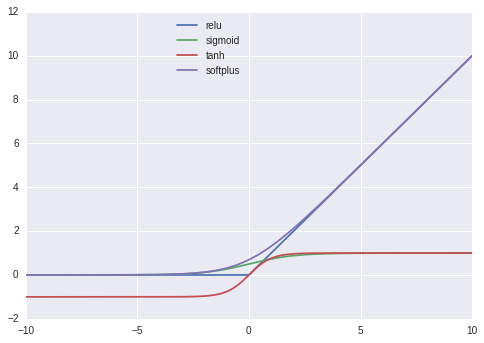

In [10]:
from tensorflow.python.ops.gen_nn_ops import relu, softplus
from tensorflow.python.ops.math_ops import sigmoid, tanh

x_value = np.linspace(-10., 10., 1000)

x = tf.placeholder(dtype=tf.float32)
relu = relu(x)
sigmoid = sigmoid(x)
tanh = tanh(x)
softplus = softplus(x)

with tf.Session() as sess:
    feed_dict = {x: x_value}
    _relu, _sigmoid, _tanh, _softplus = sess.run([relu, sigmoid, tanh, softplus], feed_dict)
    plt.plot(x_value, _relu, label='relu')
    plt.plot(x_value, _sigmoid, label='sigmoid')
    plt.plot(x_value, _tanh, label='tanh')
    plt.plot(x_value, _softplus, label='softplus')
    plt.legend(bbox_to_anchor=(0.5, 1.0))
    plt.show()

Task 4. Create operation to decrease variable $a$ by one

In [11]:
a = tf.Variable(10, dtype=tf.int32, name='a')

decrese_op = tf.assign(a, a - 1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in xrange(10):
        sess.run(decrese_op)
        a_value = sess.run(a)
        print a_value

9
8
7
6
5
4
3
2
1
0


Task 5. Create operation that returns the shape of the input.

In [15]:
tf.reset_default_graph()
a_value = [
    [3, 7, 2, 1],
    [1, 1, 4, 5],
    [3, 6, 2, 2],
    ]
a = tf.placeholder(dtype=tf.int32)

with tf.Session() as sess:
    print sess.run(tf.shape(a), feed_dict={a: a_value})

[3 4]


Task 6. Create operation to get the first half of r-th row and second half of c-th column of the matrix. (Assume matrix has even dimensions).

In [24]:
tf.reset_default_graph()
a_value = [
    [3, 7, 2, 1],
    [1, 1, 4, 5],
    [3, 6, 2, 2],
    [6, 1, 1, 3],
    ]

r_value = 2
c_value = 1
    
a = tf.placeholder(dtype=tf.int32)
r = tf.placeholder(dtype=tf.int32)
c = tf.placeholder(dtype=tf.int32)

a_rows, = tf.shape(a)[0]  = tf.shape(a)[1]

with tf.Session() as sess:
    print sess.run(
        [
            a[r,:a_cols / 2],
            a[a_rows / 2:,c]
        ],
        feed_dict = {a: a_value, r: r_value, c: c_value}
    )

[array([3, 6], dtype=int32), array([6, 1], dtype=int32)]


Task 7. Create operation that returns coordinates of the maximal element in the matrix. 

In [5]:
tf.reset_default_graph()
a_value = [
    [3, 7, 2, 1],
    [1, 1, 14, 5],
    [3, 6, 2, 17],
    [6, 9, 1, 3],
    ]

a = tf.placeholder(dtype=tf.int32)
mrow = tf.argmax(tf.reduce_max(a, 1), 0)
mcol = tf.argmax(tf.reduce_max(a, 0), 0)

with tf.Session() as sess:
    print sess.run([mrow, mcol], feed_dict={a: a_value})

[2, 3]
